In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.extensions import CU1Gate, CU3Gate, UnitaryGate
from qiskit.circuit import Parameter

delta_cp = Parameter('\\delta_{CP}')
theta_12 = Parameter('\\theta_{12}')
theta_13 = Parameter('\\theta_{13}')
theta_23 = Parameter('\\theta_{23}')

delmsq_21 = Parameter('\\Delta m^2_{21}')
delmsq_31 = Parameter('\\Delta m^2_{31}')

L = Parameter('L')
E = Parameter('E')

V = Parameter('V')

r = 10

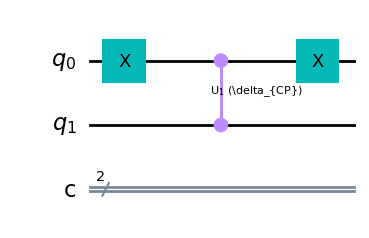

In [11]:
def R_12(theta, delta):
    pqc = QuantumCircuit(2, 2)
    
    pqc.x(0)
    pqc.append(CU3Gate(-2 * theta, delta, -delta), [0, 1])
    
    return pqc
    
def R_13(theta, delta):
    pqc = QuantumCircuit(2, 2)
    
    pqc.swap(0, 1)
    
    pqc.x(0)
    pqc.append(CU3Gate(-2 * theta, delta, -delta), [0, 1])
    pqc.x(0)
    
    pqc.swap(0, 1)
    
    return pqc
    
def R_23(theta, delta):
    pqc = QuantumCircuit(2, 2)
    
    pqc.x(0)
    pqc.cx(0, 1)
    pqc.x(0)
    
    pqc.swap(0, 1)
    
    pqc.x(0)
    pqc.append(CU3Gate(-2 * theta, delta, -delta), [0, 1])
    pqc.x(0)
    
    pqc.swap(0, 1)
    
    pqc.x(0)
    pqc.cx(0, 1)
    pqc.x(0)
    
    return pqc
    
def U_delta(delta):
    pqc = QuantumCircuit(2, 2)
    
    pqc.swap(0, 1)
    
    pqc.x(0)
    pqc.append(CU3Gate(0, delta/2, delta/2), [0, 1])
    pqc.x(0)
    
    pqc.swap(0, 1)
    
    return pqc
    
def PMNS():    
    return R_12(theta_12, 0).compose(U_delta(-delta_cp)).compose(R_13(theta_13, 0)).compose(U_delta(delta_cp)).compose(R_23(theta_23, 0))
    
def PMNSdagger():
    return R_23(-theta_23, 0).compose(U_delta(-delta_cp)).compose(R_13(-theta_13, 0)).compose(U_delta(delta_cp)).compose(R_12(-theta_12, 0))
    
def S_0():
    pqc = QuantumCircuit(2, 2)
    
    phase_21 = -2 * ((1.267 * delmsq_21 * L)/E)
    phase_31 = -2 * ((1.267 * delmsq_31 * L)/E)
    
    pqc.p(phase_31, 0)
    pqc.p(phase_21, 1)
    
    return PMNS().compose(pqc).compose(PMNSdagger())
    
def S_V():
    pqc = QuantumCircuit(2, 2)
    
def S_mat():
    return S_0().compose(S_V()).repeat(r)
        
        
def CU():
    pqc = QuantumCircuit(2, 2)
    
    pqc.x(0)
    pqc.append(CU1Gate(delta_cp), [0, 1])
    pqc.x(0)
    
    return pqc

result = CU()

result.draw('mpl')

In [14]:
from qiskit_symb.quantum_info import Operator

op = Operator(result)
op.to_sympy()

Traceback (most recent call last):
  Cell In[14], line 3
    op = Operator(result)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/quantum_info/operator.py:14 in __init__
    super().__init__(data=data, params=params)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/quantum_info/quantumbase.py:17 in __init__
    data = self._get_data_from_circuit(circuit=data)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/quantum_info/operator.py:25 in _get_data_from_circuit
    gph, circ_data = QuantumBase._get_circ_data(circuit=circuit)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/quantum_info/quantumbase.py:37 in _get_circ_data
    gate = Gate.get(instruction)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/circuit/gate.py:27 in get
    return ControlledGate.get(instruction)
  File /opt/conda/lib/python3.10/site-packages/qiskit_symb/circuit/controlledgate.py:39 in get
    return get_init(name)(*gate.params, ctrl_qubits=ctrl_qubits,
  File /o

In [ ]:
def S_mat(pqc):
    

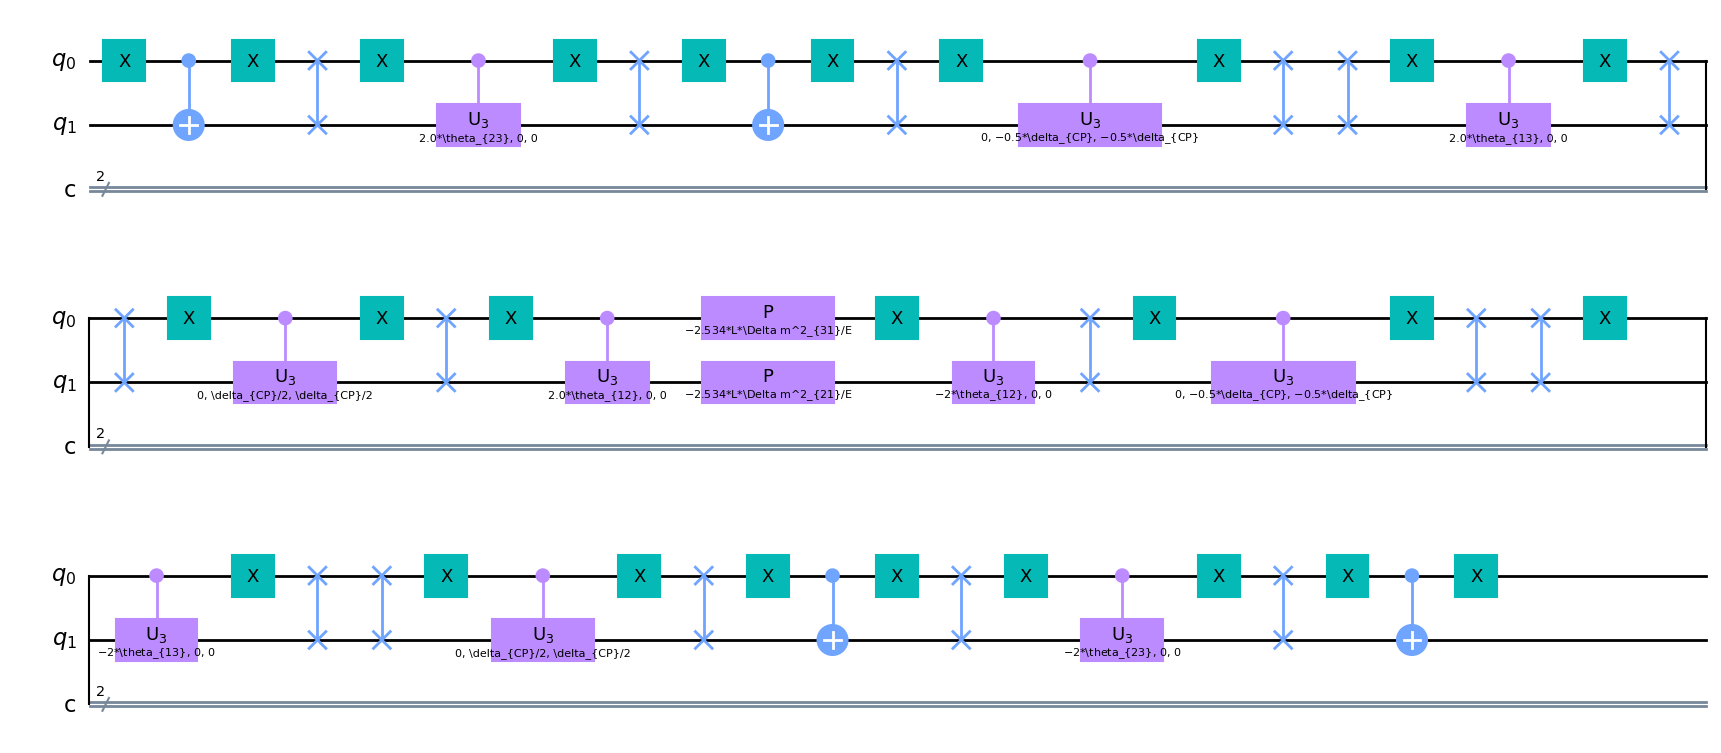

In [34]:
pqc = QuantumCircuit(2, 2)

PMNSdagger(pqc)
S(pqc)
PMNS(pqc)

pqc.draw('mpl')

Matrix([
[                                                                                                                                                                               1.0*sin(\theta_{13})*sin(1.0*\theta_{13})*cos(\theta_{12}) + 1.0*exp(-2.534*I*L*\Delta m^2_{31}/E)*cos(1.0*\theta_{12})*cos(\theta_{13})*cos(1.0*\theta_{13}),                                                                                                                                                                                                                                                                                      1.0*(1.0*sin(1.0*\theta_{12})*sin(1.0*\theta_{23}) - 1.0*exp(-1.0*I*\delta_{CP})*sin(1.0*\theta_{13})*cos(1.0*\theta_{12})*cos(1.0*\theta_{23}))*exp(-2.534*I*L*\Delta m^2_{31}/E)*cos(\theta_{13}) + 1.0*exp(-1.0*I*\delta_{CP})*sin(\theta_{13})*cos(\theta_{12})*cos(1.0*\theta_{13})*cos(1.0*\theta_{23}),                                                                             

In [18]:
!pip install qiskit-symb


[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
 
matrix = np.array([[1, 0, 0, 0],
		   [0, 0, 0, 0],
		   [0, 0, 0, 0],
		   [0, 0, 0, 0]])
 
observable = SparsePauliOp.from_operator(matrix)
print(observable)  

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
